## JupyterHUB: R notebook

In this notebook we will demonstrate a use case for R in Jupyter. We will perform a simple k-means clustering using the USArrests dataset. 

### Reading and checking data

First of all, we load the necessary packages. Be aware that, different from the IPython kernel, the IRkernel does not provide a method to pass bash commands to the terminal. This also means that you cannot install any extra packages from here. If you are missing any packages, install them before launching JupyterHUB.

In [4]:
library("ggplot2")
library("stats")
library("factoextra")

As an example, we use a locally stored version of the database (csv file):

In [27]:
#setwd(paste0(getwd(), "/R_notebook_ex"))
USArrests <- read.table("USArrests.csv")
head(USArrests, n = 10)
print(paste("The dataset contains", nrow(USArrests), "states"))

,Murder,Assault,UrbanPop,Rape
,<dbl>,<int>,<int>,<dbl>
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6
Colorado,7.9,204,78,38.7
Connecticut,3.3,110,77,11.1
Delaware,5.9,238,72,15.8
Florida,15.4,335,80,31.9


[1] "The dataset contains 50 states"


Visualizing data is exactly the same as normally. We could for example plot the amount of murder arrests per state. If you use the standard size of th plot, it becomes quite unreadable, due to the many states. 

We are using the 'repr' package to adjust the size of the graph. This package comes included with the IRkernel package and is used to create readable text and images in tools like Jupyter Notebook. More info can be found here: https://github.com/IRkernel/repr

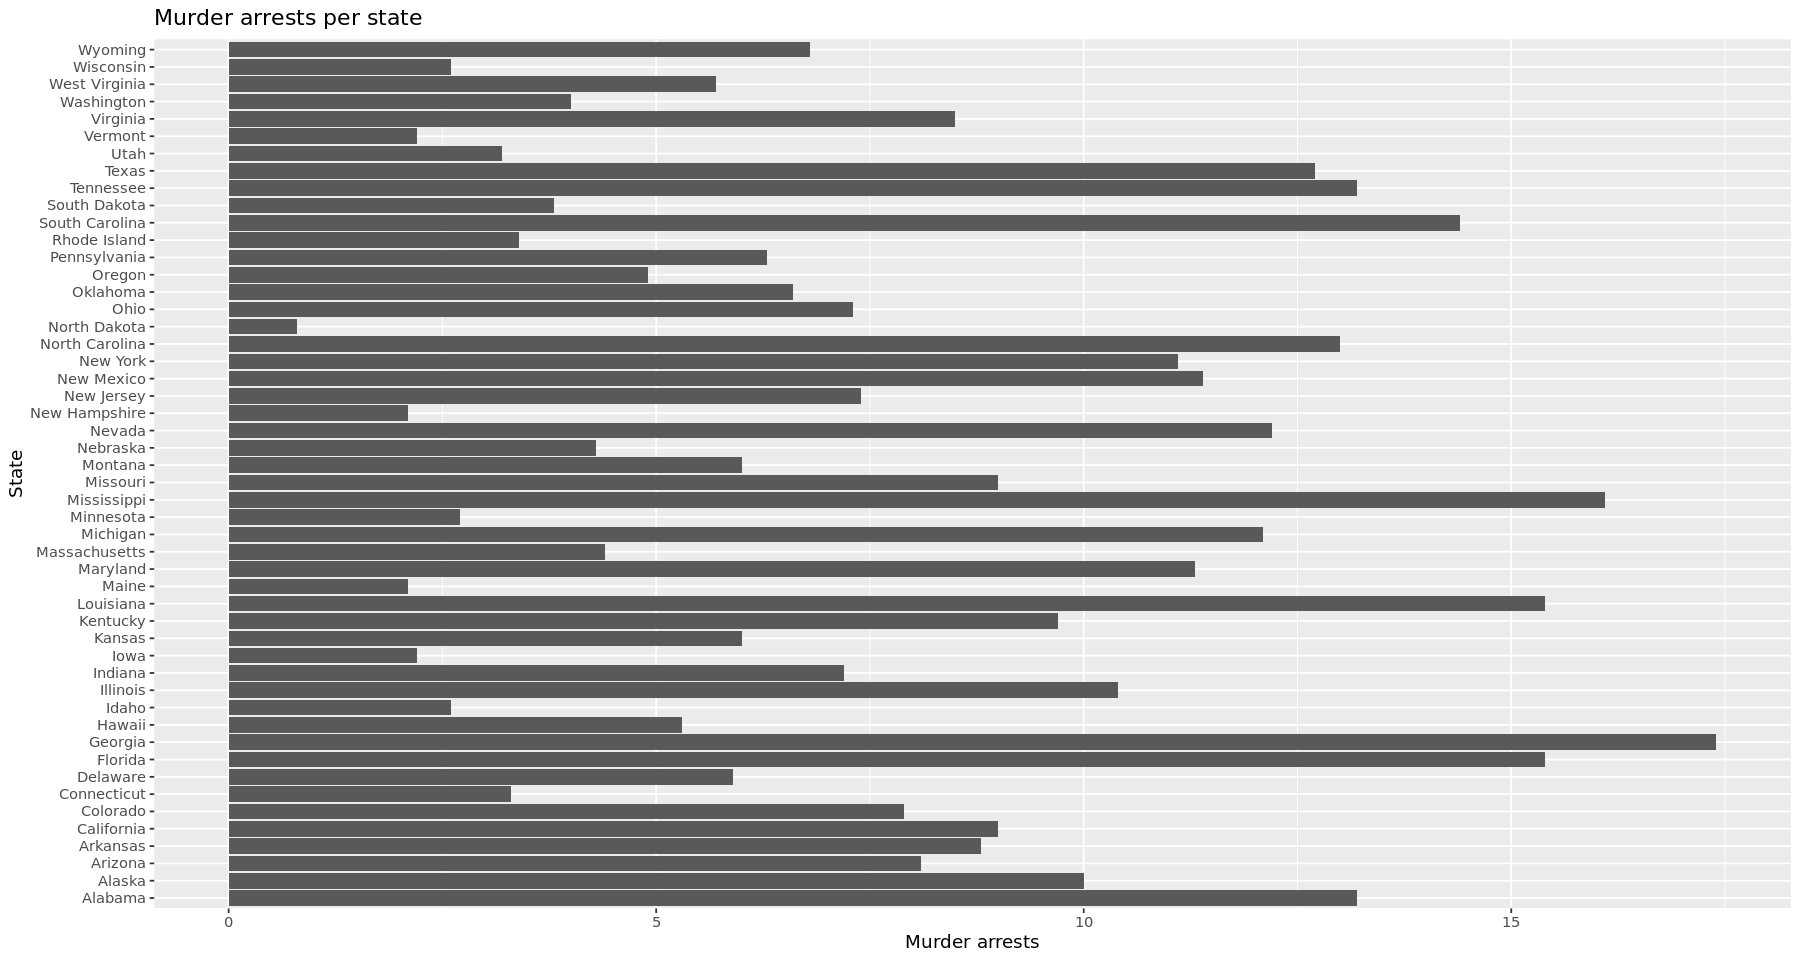

In [28]:
options(repr.plot.width=15, repr.plot.height=8)

ggplot(data=USArrests, aes(x=row.names(USArrests), y=Murder)) +
  geom_bar(stat="identity")+
  ggtitle("Murder arrests per state")+
  ylab("Murder arrests")+
  xlab("State")+
  coord_flip()
  

If we take a closer look at the values of the different variables, some scaling seems to be necessary.

In [29]:
scaled_df <- scale(USArrests)
head(scaled_df, n = 10)

,Murder,Assault,UrbanPop,Rape
Alabama,1.24256408,0.7828393,-0.5209066,-0.003416473
Alaska,0.50786248,1.1068225,-1.2117642,2.484202941
Arizona,0.07163341,1.4788032,0.9989801,1.042878388
Arkansas,0.23234938,0.2308680,-1.0735927,-0.184916602
California,0.27826823,1.2628144,1.7589234,2.067820292
Colorado,0.02571456,0.3988593,0.8608085,1.864967207
Connecticut,-1.03041900,-0.7290821,0.7917228,-1.081740768
Delaware,-0.43347395,0.8068381,0.4462940,-0.579946294
Florida,1.74767144,1.9707777,0.9989801,1.138966691
Georgia,2.20685994,0.4828549,-0.3827351,0.487701523


### Computing the clusters

First, let's set a seed to be able to reproduce our results. Here, the amount of clusters was set to 4. We use the kmeans function of the stats package. We can take a look at the output of the kmeans function:

In [31]:
set.seed(41)
km_clusters <- kmeans(scaled_df, 4, nstart=25)
print(km_clusters)

K-means clustering with 4 clusters of sizes 8, 13, 13, 16

Cluster means:
      Murder    Assault   UrbanPop        Rape
1  1.4118898  0.8743346 -0.8145211  0.01927104
2 -0.9615407 -1.1066010 -0.9301069 -0.96676331
3  0.6950701  1.0394414  0.7226370  1.27693964
4 -0.4894375 -0.3826001  0.5758298 -0.26165379

Clustering vector:
       Alabama         Alaska        Arizona       Arkansas     California 
             1              3              3              1              3 
      Colorado    Connecticut       Delaware        Florida        Georgia 
             3              4              4              3              1 
        Hawaii          Idaho       Illinois        Indiana           Iowa 
             4              2              3              4              2 
        Kansas       Kentucky      Louisiana          Maine       Maryland 
             4              2              1              2              3 
 Massachusetts       Michigan      Minnesota    Mississippi    

We can visualize the clusters easily using the "factoextra" package. As you can see, the graph size that was previously set is kept here as well.

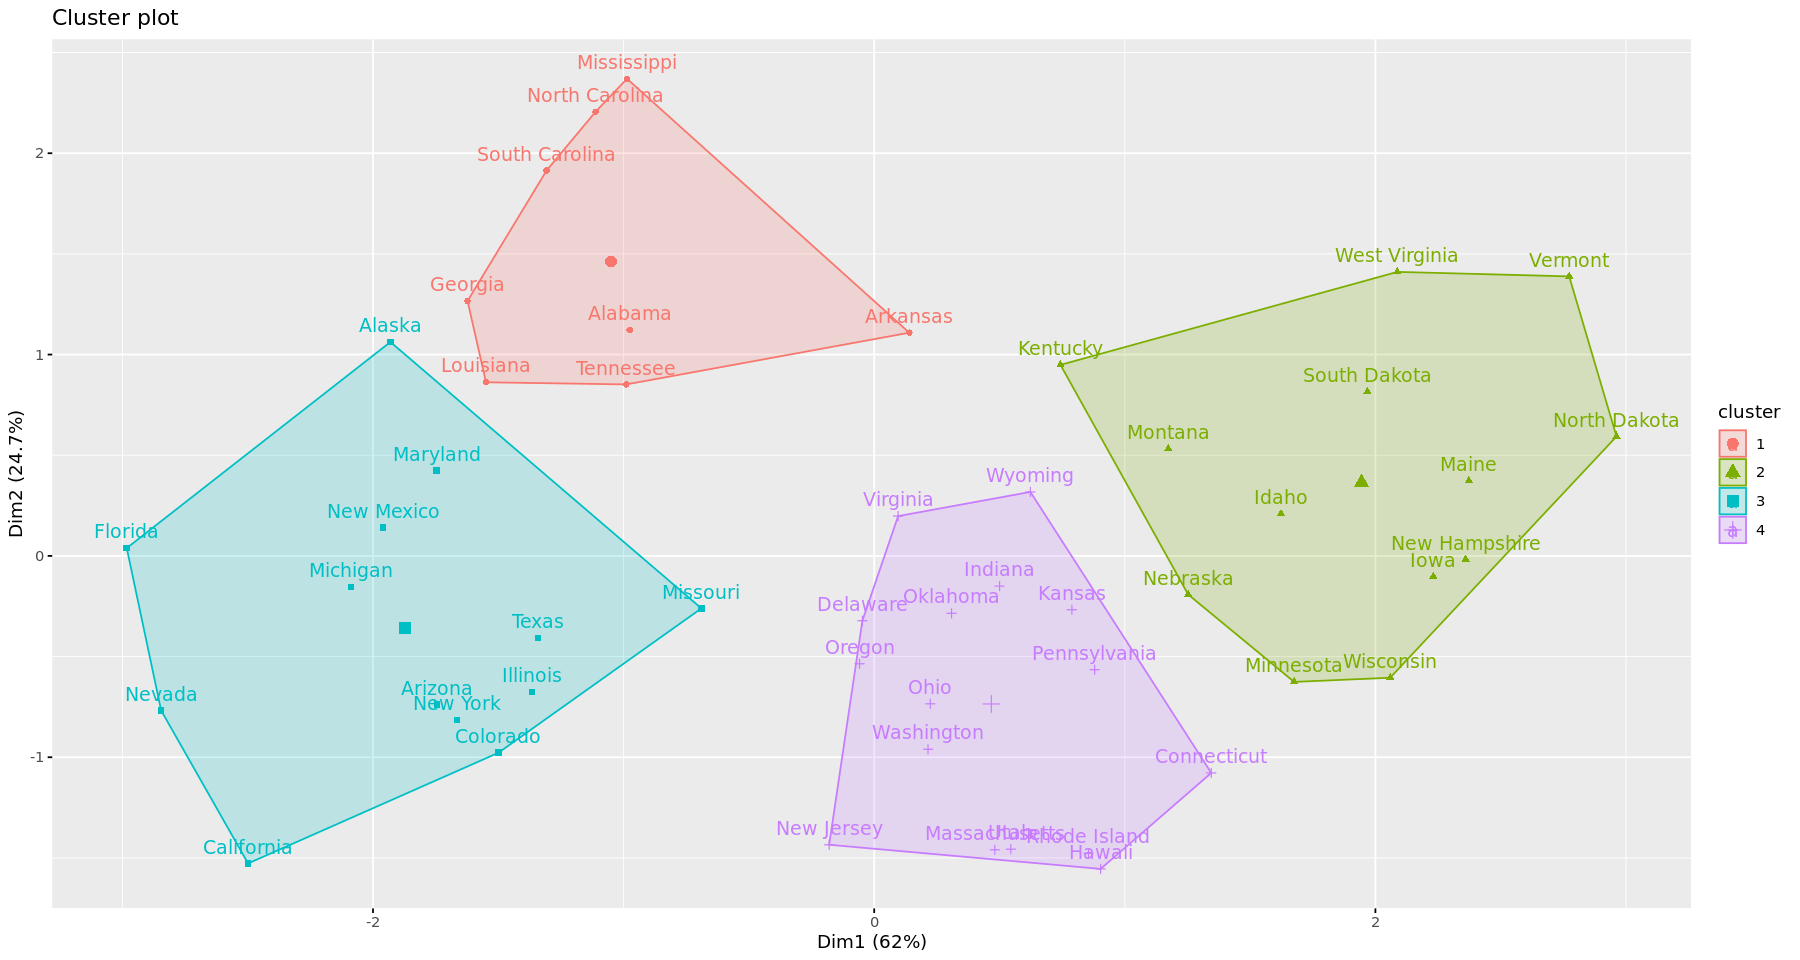

In [32]:
fviz_cluster(km_clusters, data=df)